In [19]:
from pathlib import Path
import pandas as pd
import numpy as np

In [20]:
processed = Path('../../data/processed')
selection_data = pd.read_pickle(Path(processed) / 'selection_data.pkl')

In [21]:
selection_data = selection_data[selection_data.year >= 2000]
# selection_data = selection_data[(selection_data.year < 2000) & (selection_data.year >= 1960)]

In [22]:
selection_data[['spot', 'home']].value_counts()

spot  home
1.0   0.0     1791
      1.0     1645
3.0   1.0     1001
2.0   0.0      833
      1.0      815
3.0   0.0      791
4.0   1.0      236
      0.0      184
5.0   1.0       43
      0.0       26
6.0   0.0        4
      1.0        3
7.0   0.0        1
dtype: int64

In [23]:
def adjust_plot(plt):
    plt.xaxis.grid(False)
    plt.yaxis.grid(True, linestyle='dashed', color='lightgrey')
    plt.set_axisbelow(True)
    plt.xaxis.set_ticks_position('none') 
    plt.yaxis.set_ticks_position('none') 

    plt.spines['right'].set_visible(False)
    plt.spines['top'].set_visible(False)

In [24]:
Wins = selection_data.loc[selection_data['Win'] == True, 'Win'].count()
Loses = selection_data.loc[selection_data['Win'] == False, 'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

76.8%


In [25]:
def streak_counter(df):
    df['L_Win'] = df['Win'].shift(1)
    df['L_year'] = df['year'].shift(1)
    df['start_of_streak'] = (df['Win'] != df['L_Win']) | (df['year'] != df['L_year'])
    df['streak_id'] = df['start_of_streak'].cumsum()
    df['streak_counter'] = df.groupby('streak_id').cumcount() + 1
    df.loc[df.Win == 0, 'streak_counter'] = 0
    
    return df

In [26]:
selection_data = selection_data.astype({'Win':'int8'})
selection_data = streak_counter(selection_data)
streaks = selection_data.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

26

In [27]:
year_results = selection_data.groupby('year').agg({'Win':'mean', 'streak_counter':'max'})
year_results

,Win,streak_counter
year,,
2000.0,0.765363,18
2001.0,0.761111,16
2002.0,0.811111,18
2003.0,0.752778,23
2004.0,0.775000,22
2005.0,0.786301,20
2006.0,0.755556,13
2007.0,0.784530,23
2008.0,0.765840,20


In [28]:
selection_data['EstProb'].describe()

count    7373.000000
mean        0.771951
std         0.017872
min         0.689097
25%         0.759721
50%         0.770261
75%         0.783250
max         0.837981
Name: EstProb, dtype: float64

<AxesSubplot:xlabel='EstProb', ylabel='Win'>

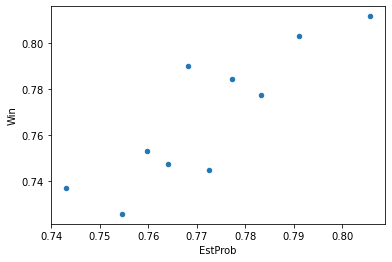

In [29]:
selection_data['bin'] = pd.qcut(selection_data['EstProb'], 10, duplicates='drop')

dots = selection_data.groupby(['bin'])[['EstProb', 'Win']].agg('mean')
dots = dots.reset_index()
dots.plot.scatter('EstProb','Win')

In [30]:
selection_data[['EstProb', 'Win']].mean()

EstProb    0.771951
Win        0.767530
dtype: float64

In [31]:
# Relief pitchers data

# Reduce noise by using rolling windows to calculate moving averages over seasons for park records, batting records, and pitching records.
# Improve to weighted averages

# Start including data from current season

# Relief pitchers data

# Game Scores/ELOs

# Team ratings

# Better Pitcher overall ratings

# Merge in 538 ELO ratings


# Set up S3 if necessary for size, or for GPUs

# Check # training observations for each model fit 
# and make sure we aren't losing any

# Ensemble methods for NN and logistic

# Rest days

# Adjust Pitcher and Batter stats for park record ( merge it in and divide) - compare adjusted at home and away stats

# New pitcher flag?

# Find out where they are in the rotation

# Fix training so that it doesn't need to specify number of variables

# Split up grid search vs. non-grid search training

# optimal skip strategy

# Why is Win missing? Check merge loss

# Time-series CV

# Come up with potential guesses remaining counter (get schedule?)

# Clean up program to select paramaters from sgd and feed them into NN

# add random state var to imputer and anything else random for repeatability

# Predict closer from roster and then use their rgs to construct estimated closing rgs (or just rgs for closing team)

# why is g d boost AUC ROC so low? check on test set

# predicting game length

# Calculate streaks by aggregating predictions by day and not counting if any pick loses.

In [32]:
restricted = selection_data.loc[
#     (selection_data['EstProb'] >= .74) &
#     (selection_data['park_factor'] >= 1) &
    (selection_data['spot'] <= 4),
    ['Win', 'year']
]

In [33]:
restricted= restricted.astype({'Win':'int8'})
restricted = streak_counter(restricted)
streaks = restricted.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

25

In [34]:
Wins = restricted.loc[
    (restricted['Win'] == True),
    'Win'].count()
Loses = restricted.loc[
    (restricted['Win'] == False),
    'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

76.7%


In [35]:
year_results = restricted.groupby('year').agg({'Win':'mean', 'streak_counter':'max'})
year_results

,Win,streak_counter
year,,
2000.0,0.764045,18
2001.0,0.764706,21
2002.0,0.810198,18
2003.0,0.749288,22
2004.0,0.773743,22
2005.0,0.785714,20
2006.0,0.754875,13
2007.0,0.785515,23
2008.0,0.764543,20


In [36]:
year_results['streak_counter'].sum()

390

In [358]:
selection_data = selection_data.sort_values(['year', 'Date'])

In [359]:
selection_data['pick_day'] = selection_data.groupby(['year']).cumcount() + 1
selection_data['pick_day'] = np.ceil(selection_data['pick_day'] / 2)

In [360]:
year_results.sort_values(['Win'], ascending=[False])

,Win,streak_counter
year,,
2007.0,0.813370,27
2005.0,0.791086,17
2002.0,0.788732,18
2008.0,0.781768,17
2004.0,0.780556,23
2001.0,0.773529,22
2013.0,0.772727,21
2009.0,0.770950,25
2000.0,0.766854,19
